# Proyecto 2: Primera parte
Curso Ingeniería de Características


**Estephania Pivac Alcaraz**

---

**Problema de interés:**
Estudiar la relación que existe entre la cantidad de accidentes de tránsito y la inversión a la conservación de carreteras y presupuesto gubernamental.

## 1. Abriendo las bases de datos

Abrimos las bases de datos que estaremos utilizando. Para esto construiremos los dataframes necesarios así como también limpiaremos y analizaremos dichos datos.

Comenzamos importando librerías que necesitaremos

In [3]:
# Instalamos Pandas-profiling
#pip install Pandas-Profiling

# Importamos algunas librerías que vamos a necesitar
import os  # Para manejo de archivos y directorios
import urllib.request # Una forma estandard de descargar datos
# import requests # Otra forma no de las librerías de uso comun

import datetime # Fecha de descarga
import pandas as pd # Solo para ver el archivo descargado
import zipfile # Descompresión de archivos
import numpy as np
from pandas_profiling import ProfileReport

### 1.1 Tidy_accidentes: Base de datos de accidentes de tránsito

Abrimos el archivo con la información de los accidentes de tránsito en México desde 2017 hasta 2021. Generamos el dataframe con el que estaremos trabajando y convertimos cada columna al tipo de dato adecuado.

In [4]:
# Generamos el dataframe de accidentes
tidy_accidentes = pd.read_csv("tidy_accidentes.csv", index_col=False)

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
#tidy_accidentes = tidy_accidentes.astype({'TIPACCID':'category', 'CAUSAACCI':'category', 'CAPAROD':'category', 'CLASACC':'category', 'EDAD':'category'})

# Fechas
#tidy_accidentes['FECHA'] = pd.to_datetime(tidy_accidentes['FECHA'], format='%Y/%m/%d', errors='coerce')
#tidy_accidentes.info()

Observemos la estructura de la base de datos:

In [5]:
tidy_accidentes.head()

,ID_ENTIDAD,ANIO,TIPACCID,CAUSAACCI,CAPAROD,CLASACC,FECHA,EDAD
0,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-03,28-37
1,1,2021,Salida del camino,Conductor,Pavimentada,No fatal,2021-01-04,Menor de edad
2,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-17,48-57
3,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-26,Se fugó
4,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-28,38-47


Veamos que esta base de datos no contiene datos faltantes:

In [6]:
tidy_accidentes.isnull().sum()

ID_ENTIDAD    0
ANIO          0
TIPACCID      0
CAUSAACCI     0
CAPAROD       0
CLASACC       0
FECHA         0
EDAD          0
dtype: int64

### 1.2 Tidy conservación: Base de datos de conservación de carreteras del año 2019

Abrimos el archivo csv y lo guardamos en formato de dataframe

In [16]:
# Generamos el dataframe de conservación
tidy_conservacion = pd.read_csv("tidy_conservacion.csv", index_col=False)
tidy_conservacion

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
#tidy_conservacion = tidy_conservacion.astype({'ENTIDAD':'category', 'PROGRAMA_CONSERVACION':'category'})

# Convertimos TOTAL_CONSERVACION a int
tidy_conservacion = tidy_conservacion.astype({'TOTAL_CONSERVACION':'int'})

tidy_conservacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID_ENTIDAD             1859 non-null   int64 
 1   ENTIDAD                1859 non-null   object
 2   TOTAL_CONSERVACION     1859 non-null   int64 
 3   PROGRAMA_CONSERVACION  1859 non-null   object
dtypes: int64(2), object(2)
memory usage: 58.2+ KB


In [17]:
tidy_conservacion.isnull().sum()

ID_ENTIDAD               0
ENTIDAD                  0
TOTAL_CONSERVACION       0
PROGRAMA_CONSERVACION    0
dtype: int64

In [18]:
tidy_conservacion

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_CONSERVACION
0,9,CIUDAD DE MEXICO,129436333,Estudios y/o Proyectos
1,9,CIUDAD DE MEXICO,109148272,Programa Asociación Público Privada de Conserv...
2,9,CIUDAD DE MEXICO,49970811,Programa Asociación Público Privada de Conserv...
3,9,CIUDAD DE MEXICO,85144638,Programa Asociación Público Privada de Conserv...
4,9,CIUDAD DE MEXICO,24157274,Programa Asociación Público Privada de Conserv...
...,...,...,...,...
1854,32,ZACATECAS,6094560,Conservación Rutinaria
1855,32,ZACATECAS,5716600,Conservación Rutinaria
1856,32,ZACATECAS,1633732,Otros Subprogramas
1857,32,ZACATECAS,2625802,Otros Subprogramas


In [19]:
tidy_conservacion['PROGRAMA_CONSERVACION'].value_counts()

Conservación Periódica                                  721
Conservación Rutinaria                                  632
Señalamiento                                            234
Reconstrucción                                          125
Otros Subprogramas                                       80
Coparticipación FONDEN                                   26
Conservación Rutinaria                                   14
Programa Asociación Público Privada de Conservación      11
Programa Asociación Público Privada de Conservación       7
Señalamiento                                              4
Reconstrucción                                            2
Contratos Plurianuales de Conservación de Carreteras      2
Estudios y/o Proyectos                                    1
Name: PROGRAMA_CONSERVACION, dtype: int64

### 1.3 Budget transparency: Base de datos sobre el presupuesto público aprobado de 2013 a 2021

In [20]:
# Generamos el dataframe de presupuesto
df_budget = pd.read_csv("budget_transparency.csv", index_col=False)
df_budget

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
df_budget = df_budget.astype({'State':'category', 'Expenses Type ID':'category'})

# Convertimos Year a datetime
df_budget['Year'] = pd.to_datetime(df_budget['Year'], format='%Y', errors='coerce')

df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   State ID          288 non-null    int64         
 1   State             288 non-null    category      
 2   Year              288 non-null    datetime64[ns]
 3   Expenses Type ID  288 non-null    category      
 4   Expenses Type     288 non-null    object        
 5   Amount Approved   288 non-null    int64         
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 11.1+ KB


In [21]:
# Exploramos el dataframe
df_budget

,State ID,State,Year,Expenses Type ID,Expenses Type,Amount Approved
0,1,Aguascalientes,2013-01-01,8,Gasto de Obra Pública,1511908040
1,1,Aguascalientes,2014-01-01,8,Gasto de Obra Pública,1865135779
2,1,Aguascalientes,2015-01-01,8,Gasto de Obra Pública,1659723400
3,1,Aguascalientes,2016-01-01,8,Gasto de Obra Pública,1717532284
4,1,Aguascalientes,2017-01-01,8,Gasto de Obra Pública,1230564370
...,...,...,...,...,...,...
283,32,Zacatecas,2017-01-01,8,Gasto de Obra Pública,1992505733
284,32,Zacatecas,2018-01-01,8,Gasto de Obra Pública,2284882371
285,32,Zacatecas,2019-01-01,8,Gasto de Obra Pública,2567673138
286,32,Zacatecas,2020-01-01,8,Gasto de Obra Pública,2010497486


In [22]:
# Observamos si existen datos faltantes
df_budget.isnull().sum()

State ID            0
State               0
Year                0
Expenses Type ID    0
Expenses Type       0
Amount Approved     0
dtype: int64

## 2. EDA automático utilizando Pandas-profiling
Análisis exploratiorio de datos automático generado en html.

### 2.1 EDA: Tidy_accidentes

In [ ]:
# Generamos el reporte en formato html usando pandas-profiling
prof = ProfileReport(tidy_accidentes)
prof.to_file(output_file='EDA_accientes.html')


from pandas_profiling import ProfileReport 

profile = ProfileReport(
    tidy_accidentes, 
    explorative=True,
    title='Reporte de TablaTidy.csv', 
    html={'style':{'full_width':True}}
) 
profile.to_file("TablaTidy-pandas-profiler.html")

#%% Probando Sweetview
!pip install sweetviz
import sweetviz

sw_tidy_accidentes = sweetviz.analyze(tidy_accidentes)
sw_tidy_accidentes.show_html("TablaTidy-sweetview.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

### 2.2 EDA: Tidy_conservacion

In [15]:
# Generamos el reporte en formato html usando pandas-profiling
prof = ProfileReport(tidy_conservacion)
prof.to_file(output_file='EDA_conservacion.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: Value '83.6923076923077' should be a ratio between 1 and 0.

### 2.3 EDA: df_budget

In [ ]:
# Generamos el reporte en formato html usando pandas-profiling
prof = ProfileReport(df_budget)
prof.to_file(output_file='EDA_budget.html')

## 3. EDA orientado a relación entre variables

Abordaremos variables más específicas para estudiar la relación que nos interesa.

### 3.1 Accidentes: frecuencia, tipo y causa

In [ ]:
tidy_accidentes.head()

In [ ]:
tidy_accidentes['ANIO'].value_counts()

A partir de la siguiente gráfica podemos observar que hubo un aumento en la camntidad de accidentes anuales en nuestro estado. Veamos que sucedió con el presupuesto aprobado para el estado así como con los programas de conservación de carreteras del año 2019.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

anio_accid = tidy_accidentes['ANIO'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(y = anio_accid.values, x = anio_accid.index, alpha=0.9)

plt.title('Frecuencia de accidentes por año')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.xticks(rotation=90)
plt.show()

NameError: name 'tidy_accidentes' is not defined

Nos concentramos en los datos conocidos sobre nuestro estado.

In [ ]:
sum(tidy_accidentes['ID_ENTIDAD']== 26)
tidy_accidentes_son = tidy_accidentes[tidy_accidentes['ID_ENTIDAD'] == 26]
tidy_accidentes_son

In [ ]:
anio_accid = tidy_accidentes_son['ANIO'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(y = anio_accid.values, x = anio_accid.index, alpha=0.9)

plt.title('Frecuencia de accidentes por año')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [20]:
tidy_accidentes['CAUSAACCI'].value_counts()

Conductor                    78259
Mala condición del camino     2312
Otra                          1277
Name: CAUSAACCI, dtype: int64

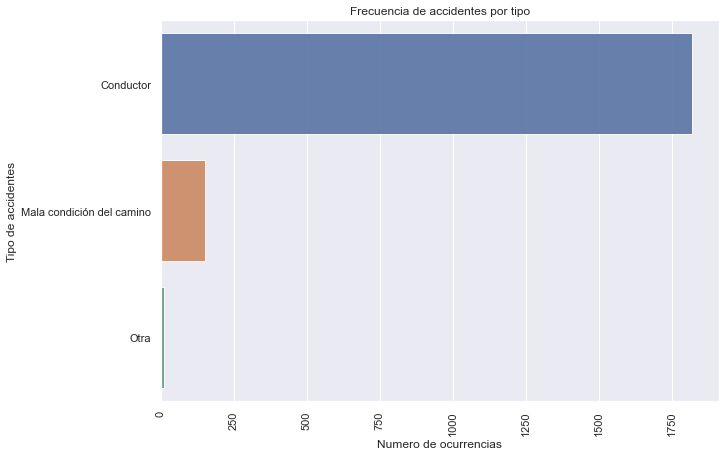

In [21]:
tipo_acc_count = tidy_accidentes_son['CAUSAACCI'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(x = tipo_acc_count.values, y = tipo_acc_count.index, alpha=0.9)

plt.title('Frecuencia de accidentes por tipo')
plt.ylabel('Tipo de accidentes', fontsize=12)
plt.xlabel('Numero de ocurrencias', fontsize=12)
plt.xticks(rotation=90)
plt.show()

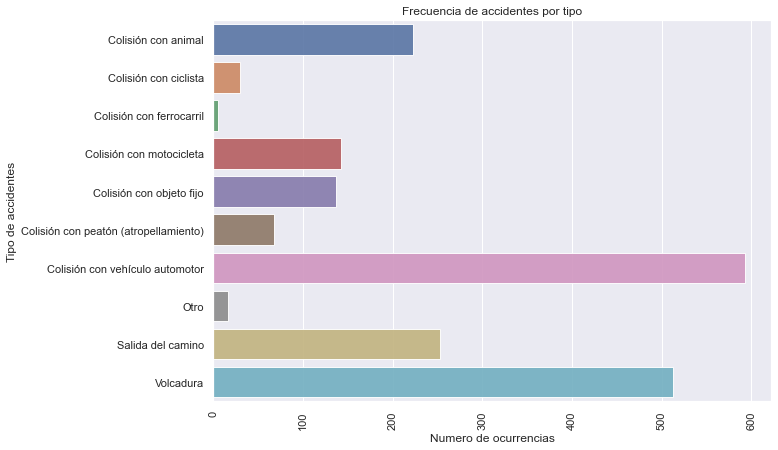

In [22]:
tipo_acc_count = tidy_accidentes_son['TIPACCID'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(x = tipo_acc_count.values, y = tipo_acc_count.index, alpha=0.9)

plt.title('Frecuencia de accidentes por tipo')
plt.ylabel('Tipo de accidentes', fontsize=12)
plt.xlabel('Numero de ocurrencias', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### 3.2 Conservación 2019

In [23]:
tidy_conservacion

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_CONSERVACION
0,9,CIUDAD DE MEXICO,129436333,Estudios y/o Proyectos
1,9,CIUDAD DE MEXICO,109148272,Programa Asociación Público Privada de Conserv...
2,9,CIUDAD DE MEXICO,49970811,Programa Asociación Público Privada de Conserv...
3,9,CIUDAD DE MEXICO,85144638,Programa Asociación Público Privada de Conserv...
4,9,CIUDAD DE MEXICO,24157274,Programa Asociación Público Privada de Conserv...
...,...,...,...,...
1854,32,ZACATECAS,6094560,Conservación Rutinaria
1855,32,ZACATECAS,5716600,Conservación Rutinaria
1856,32,ZACATECAS,1633732,Otros Subprogramas
1857,32,ZACATECAS,2625802,Otros Subprogramas


In [24]:
tidy_conservacion_son = tidy_conservacion[tidy_conservacion['ID_ENTIDAD']== 26]
tidy_conservacion_son

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_CONSERVACION
1399,26,SONORA,9055015,Reconstrucción
1400,26,SONORA,8800000,Reconstrucción
1401,26,SONORA,19000000,Reconstrucción
1402,26,SONORA,13087627,Reconstrucción
1403,26,SONORA,7879310,Reconstrucción
...,...,...,...,...
1463,26,SONORA,611719,Conservación Rutinaria
1464,26,SONORA,3978055,Conservación Rutinaria
1465,26,SONORA,25160,Conservación Rutinaria
1466,26,SONORA,2612193,Otros Subprogramas


Analicemos el total de dinero invertido en conservación de carreteras:

<AxesSubplot:xlabel='TOTAL_CONSERVACION'>

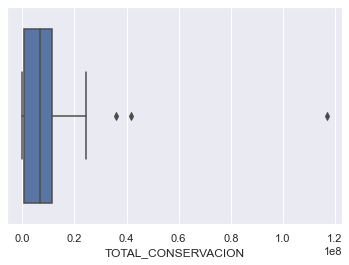

In [36]:
sns.boxplot(x = tidy_conservacion_son['TOTAL_CONSERVACION'])

In [30]:
print( tidy_conservacion_son['TOTAL_CONSERVACION'].describe())

count    6.900000e+01
mean     9.464841e+06
std      1.546229e+07
min      1.823300e+04
25%      7.863690e+05
50%      6.896897e+06
75%      1.145010e+07
max      1.168523e+08
Name: TOTAL_CONSERVACION, dtype: float64


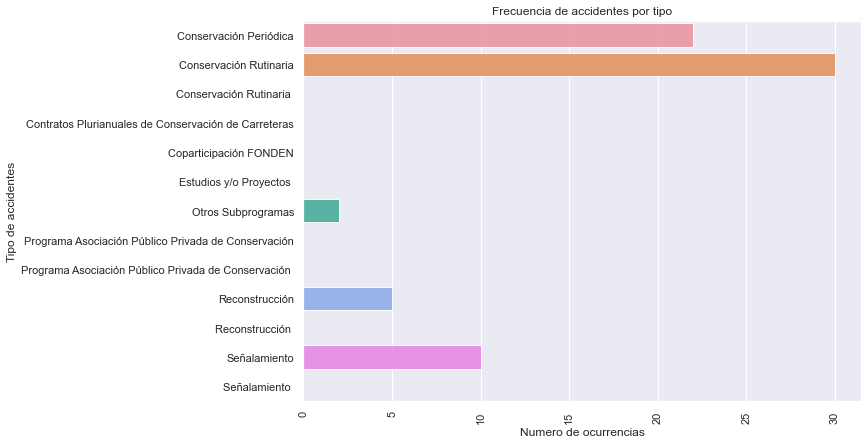

In [38]:
tipo_acc_count = tidy_conservacion_son['PROGRAMA_CONSERVACION'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(x = tipo_acc_count.values, y = tipo_acc_count.index, alpha=0.9)

plt.title('Frecuencia de accidentes por tipo')
plt.ylabel('Tipo de accidentes', fontsize=12)
plt.xlabel('Numero de ocurrencias', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [39]:
tidy_conservacion_son['PROGRAMA_CONSERVACION'].value_counts()

Conservación Rutinaria                                  30
Conservación Periódica                                  22
Señalamiento                                            10
Reconstrucción                                           5
Otros Subprogramas                                       2
Conservación Rutinaria                                   0
Contratos Plurianuales de Conservación de Carreteras     0
Coparticipación FONDEN                                   0
Estudios y/o Proyectos                                   0
Programa Asociación Público Privada de Conservación      0
Programa Asociación Público Privada de Conservación      0
Reconstrucción                                           0
Señalamiento                                             0
Name: PROGRAMA_CONSERVACION, dtype: int64

### 3.3 Budget

In [44]:
df_budget = df_budget[df_budget['State']== 'Sonora']
df_budget

,State ID,State,Year,Expenses Type ID,Expenses Type,Amount Approved
225,26,Sonora,2013-01-01,8,Gasto de Obra Pública,4465273769
226,26,Sonora,2014-01-01,8,Gasto de Obra Pública,5040127242
227,26,Sonora,2015-01-01,8,Gasto de Obra Pública,4883180415
228,26,Sonora,2016-01-01,8,Gasto de Obra Pública,4759231696
229,26,Sonora,2017-01-01,8,Gasto de Obra Pública,1725263163
230,26,Sonora,2018-01-01,8,Gasto de Obra Pública,2194153522
231,26,Sonora,2019-01-01,8,Gasto de Obra Pública,3191538746
232,26,Sonora,2020-01-01,8,Gasto de Obra Pública,2767475012
233,26,Sonora,2021-01-01,8,Gasto de Obra Pública,2142694615


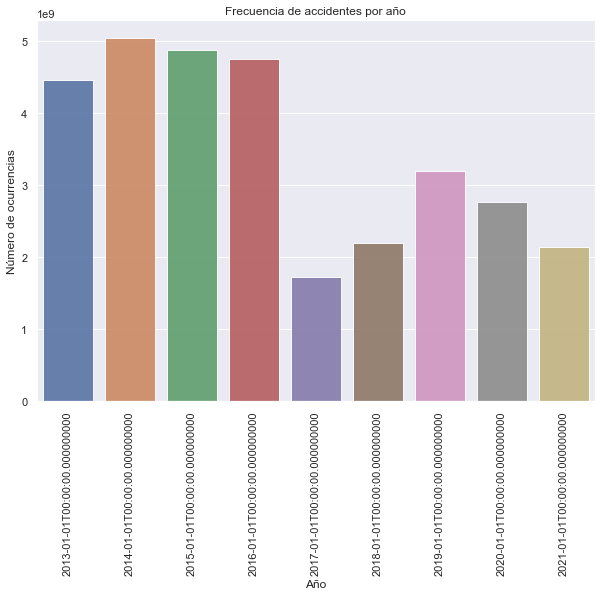

In [47]:
anio_budget = df_budget['Amount Approved'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(x = df_budget['Amount Approved'], y = anio_budget.index, alpha=0.9)

plt.title('Frecuencia de accidentes por año')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Year'>

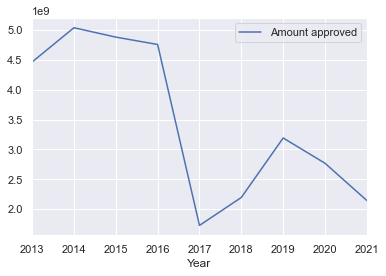

In [53]:
import matplotlib.pyplot as plt
  
# Create a list of data
# to be represented in x-axis
year = df_budget['Year']
  
# Create a list of data
# to be represented in y-axis
amount = df_budget['Amount Approved']

  
# Create a dataframe using the two lists
df_days_calories = pd.DataFrame(
    { 'Year' : year , 
     'Amount approved': amount})
  
ax = plt.gca()
  
#use plot() method on the dataframe
df_days_calories.plot( x = 'Year' , y = 'Amount approved', ax = ax )

Sumamos los accidentes para obtener el total de accidentes por año. Para esto utilizaremos onehot encoding para convertir las variables cualitativas a variables dummy:

In [54]:
# Creamos una copia del dataframe tidy accidentes
df_accidentes_onehot = tidy_accidentes.copy()

# Nos deshacemos de la columna FECHA ya que no la podremos agrupar
df_accidentes_onehot.pop('FECHA')

# Agregamos una nueva columna al dataframe que identifique cada accidente con 1.
df_accidentes_onehot['Total_accidentes'] = 1

# Identificamos las variables cualitativas
variables_cualitativas = ['ANIO', 'TIPACCID', 'CAUSAACCI', 'CAPAROD', 'CLASACC', 'EDAD']

# Aplicamos el método OneHot:
for x in variables_cualitativas:
  df_accidentes_onehot = pd.get_dummies(
      df_accidentes_onehot, 
      columns = [x], 
      prefix = [x],
      dtype=int
  )

df_accidentes_onehot

,ID_ENTIDAD,Total_accidentes,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,...,CLASACC_No fatal,CLASACC_Sólo daños,EDAD_18-27,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Menor de edad,EDAD_Se fugó
0,1,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81843,32,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
81844,32,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
81845,32,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
81846,32,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [55]:
# Obtenemos los nombres de las columnas de nuestro dataframe
nombres_columnas = list(df_accidentes_onehot.columns.values)

# Creamos un nuevo dataframe con las mismas columnas
tidy_suma_accidentes = pd.DataFrame(columns = nombres_columnas) 

# Sumamos el total de accidentes por estado
for i in range(1, 33):
  df = pd.DataFrame(df_accidentes_onehot[df_accidentes_onehot['ID_ENTIDAD'] == i].iloc[:, 1:].sum(axis=0, numeric_only=True))
  df = df.transpose()
  df['ID_ENTIDAD'] = i
  tidy_suma_accidentes = tidy_suma_accidentes.append(df)

# Reinicamos los índices
tidy_suma_accidentes = tidy_suma_accidentes.reset_index(drop = True)

# Obtenemos nuestro dataframe
tidy_suma_accidentes

,ID_ENTIDAD,Total_accidentes,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,...,CLASACC_No fatal,CLASACC_Sólo daños,EDAD_18-27,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Menor de edad,EDAD_Se fugó
0,1,1222,228,241,191,254,308,31,20,20,...,440,696,305,268,158,105,58,73,75,180
1,2,489,14,60,74,123,218,1,8,3,...,128,342,106,107,71,53,23,30,12,87
2,3,93,21,21,18,15,18,3,2,0,...,30,59,22,16,10,14,4,10,4,13
3,4,559,117,126,121,97,98,14,5,0,...,182,325,90,111,91,43,7,20,8,189
4,5,466,71,69,105,77,144,35,1,6,...,88,348,104,91,83,52,24,32,17,63
5,6,1852,365,360,355,387,385,99,41,7,...,650,1160,413,387,404,167,94,217,66,104
6,7,2492,415,457,613,448,559,18,16,0,...,674,1604,114,203,110,56,31,1183,14,781
7,8,3674,1001,797,730,536,610,230,14,7,...,810,2697,873,744,540,330,171,353,166,497
8,9,6,0,0,2,0,4,0,0,0,...,2,3,0,1,0,0,0,0,1,4
9,10,1103,188,157,211,222,325,119,9,4,...,310,730,246,236,174,122,57,109,50,109


In [57]:
sum_accidentes_son = tidy_suma_accidentes[tidy_suma_accidentes['ID_ENTIDAD'] == 26]
sum_accidentes_son

,ID_ENTIDAD,Total_accidentes,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,TIPACCID_Colisión con animal,TIPACCID_Colisión con ciclista,TIPACCID_Colisión con ferrocarril,...,CLASACC_No fatal,CLASACC_Sólo daños,EDAD_18-27,EDAD_28-37,EDAD_38-47,EDAD_48-57,EDAD_58-67,EDAD_Mayor_de_67,EDAD_Menor de edad,EDAD_Se fugó
25,26,1980,407,434,482,279,378,223,30,5,...,610,1214,397,382,324,214,93,254,65,251


In [66]:
anual_sum_accidentes_son = { 'Year' : [ 2017, 2018, 2019, 2020, 2021],
                            'Accidentes' : [407, 434, 482, 279, 378]
}
anual_sum_accidentes_son = pd.DataFrame(anual_sum_accidentes_son)
anual_sum_accidentes_son

,Year,Accidentes
0,2017,407
1,2018,434
2,2019,482
3,2020,279
4,2021,378


<AxesSubplot:xlabel='Year'>

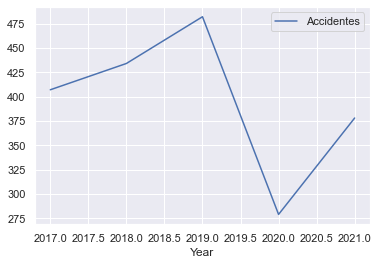

In [69]:
# Create a list of data
# to be represented in x-axis
year = anual_sum_accidentes_son['Year']
  
# Create a list of data
# to be represented in y-axis
accidentes = anual_sum_accidentes_son['Accidentes']

  
# Create a dataframe using the two lists
df_days_calories = pd.DataFrame(
    { 'Year' : year , 
     'Accidentes': accidentes})
  
ax = plt.gca()
  
#use plot() method on the dataframe
df_days_calories.plot( x = 'Year' , y = 'Accidentes', ax = ax )